# 15. Segmentation - Watersheds

Segment some color images using the marker-based watershed algorithm – cv.watershed(). Note that, before using
the watershed() function, you need to obtain an initial set of region markers.

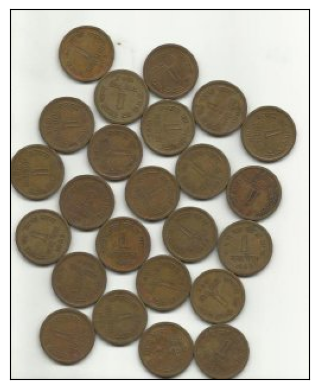

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = './data'
FILENAME = 'watershed_coins.jpg'

img = cv2.imread(os.path.join(DATA_DIR, FILENAME))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(img_rgb)
plt.show()

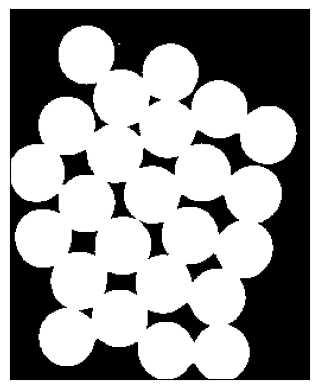

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's binarization
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.xticks([]), plt.yticks([])
plt.imshow(thresh, cmap='gray')
plt.show()

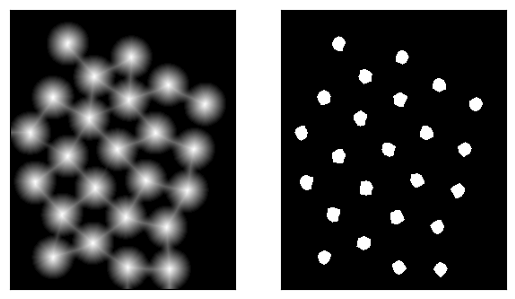

In [4]:
# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Plot Distance Transform
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(dist_transform, cmap='gray')

# Plot Sure Foreground
plt.subplot(122), plt.xticks([]), plt.yticks([])
plt.imshow(sure_fg, cmap='gray')

plt.show()

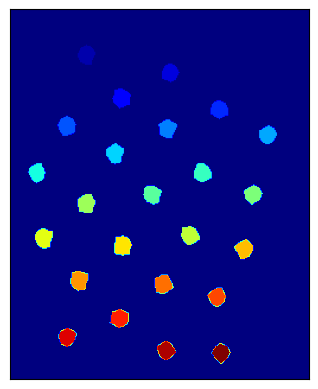

In [5]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, is 1
markers = markers + 1

# Mark region of unkown with 0
markers[markers == 255] = 0

# Plot Markers
plt.xticks([]), plt.yticks([])
plt.imshow(markers, cmap='jet')
plt.show()

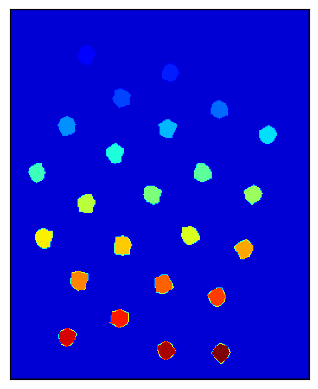

In [7]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]